In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

2022-06-03 11:09:57.050390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-03 11:09:57.050421: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(mnist_ds_train, mnist_ds_test) , mnist_info = tfds.load("mnist", split=["train", "test"], with_info=True)

2022-06-03 09:48:59.964520: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-03 09:48:59.964549: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-03 09:48:59.964572: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (calcifer-Inspiron-7370): /proc/driver/nvidia/version does not exist
2022-06-03 09:48:59.965668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Explore a TF Dataset

In [8]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/home/calcifer/tensorflow_datasets/mnist/3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [28]:
for example in mnist_ds_train.take(1):
  print(example.keys())

dict_keys(['image', 'label'])


2022-06-03 10:52:45.827247: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [13]:
from matplotlib import pyplot as plt

%matplotlib inline

Label: 4
image shape: (28, 28, 1)


2022-06-03 10:51:42.448653: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


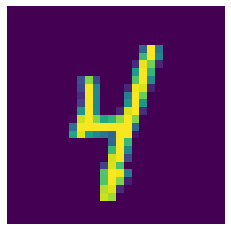

In [24]:
for r in tfds.as_numpy(mnist_ds_train.take(1)):
  print("Label:", r['label'])
  print("image shape:", r["image"].shape)
  plt.imshow(r['image'])
  plt.axis("off")

2022-06-03 10:52:20.210862: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


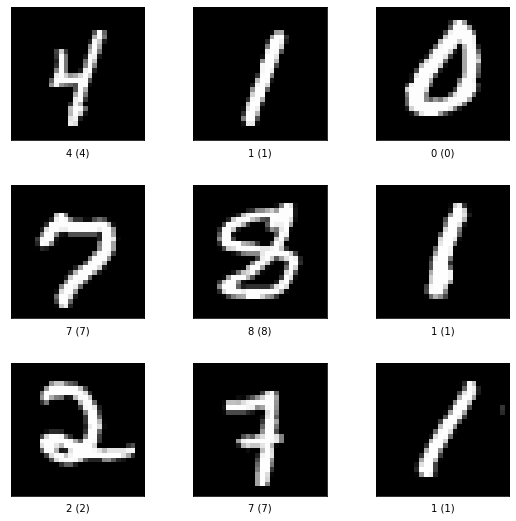

In [27]:
fig = tfds.show_examples(mnist_ds_train, mnist_info)

# Exaple: Fashion MNIST

In [110]:
(fmnist_train, fmnist_test), fminst_info = tfds.load(
  name="fashion_mnist",
  as_supervised=True,
  with_info=True,
  split=["train", "test"]
)

In [111]:
print(fminst_info.features)

print("Class names:", fashion_info.features["label"].names)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Rescaling, Input, Reshape, Resizing
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [113]:
Input?

Signature:
Input(
    shape=None,
    batch_size=None,
    name=None,
    dtype=None,
    sparse=None,
    tensor=None,
    ragged=None,
    type_spec=None,
    **kwargs,
)
Docstring:
`Input()` is used to instantiate a Keras tensor.

A Keras tensor is a symbolic tensor-like object,
which we augment with certain attributes that allow us to build a Keras model
just by knowing the inputs and outputs of the model.

For instance, if `a`, `b` and `c` are Keras tensors,
it becomes possible to do:
`model = Model(input=[a, b], output=c)`

Args:
    shape: A shape tuple (integers), not including the batch size.
        For instance, `shape=(32,)` indicates that the expected input
        will be batches of 32-dimensional vectors. Elements of this tuple
        can be None; 'None' elements represent dimensions where the shape is
        not known.
    batch_size: optional static batch size (integer).
    name: An optional name string for the layer.
        Should be unique in a model (do not reus

In [114]:
BATCH_SIZE = 64
EPOCHS = 10

In [121]:
tf.keras.backend.clear_session()

model = Sequential([
    Input(shape=fashion_info.features["image"].shape),
    Rescaling(scale=1./127.5, offset=-1),
    Flatten(),
    Dense(units=64, activation="relu", kernel_regularizer="l2"),
    # Dropout(0.2),
    Dense(units=32, activation="relu", kernel_regularizer="l2"),
    # Dropout(0.2),
    Dense(units=16, activation="relu", kernel_regularizer="l2"),
    # Dropout(0.2),
    Dense(units=10, activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-traina

In [122]:
fmnist_train_batched = fmnist_train.batch(BATCH_SIZE).cache().prefetch(1)
fmnist_test_batched = fmnist_test.batch(BATCH_SIZE).cache().prefetch(1)

In [123]:
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)
model.fit(
    fmnist_train_batched,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=fmnist_test_batched,
)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 1.1545 - accuracy: 0.7859 - val_loss: 0.8437 - val_accuracy: 0.7956
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.7639 - accuracy: 0.8206 - val_loss: 0.7718 - val_accuracy: 0.8025
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.7174 - accuracy: 0.8249 - val_loss: 0.7344 - val_accuracy: 0.8084
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6897 - accuracy: 0.8282 - val_loss: 0.7153 - val_accuracy: 0.8119
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6685 - accuracy: 0.8310 - val_loss: 0.6990 - val_accuracy: 0.8143
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6515 - accuracy: 0.8346 - val_loss: 0.6882 - val_accuracy: 0.8167
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6379 - accuracy: 0.8364 - val_loss: 0.6748 - val_accuracy: 0.8189
Epoch 